<a href="https://colab.research.google.com/github/RekyanAnantaVera/Data-Mining/blob/main/UKT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [15]:
ukt=pd.read_csv('ukt.csv')

In [102]:
ukt.head()

,Tempat Tinggal,Pekerjaan Orang Tua,Penghasilan Orang Tua,Jumlah Tanggungan Orang Tua,Kendaraan,Kelayakan Keringanan UKT
0,0,PNS,10000000,3,1,0
1,0,TNI/POLRI,8000000,2,2,1
2,1,Petani,4000000,4,0,0
3,1,Nelayan,3000000,5,1,0
4,0,Buruh,2000000,2,1,1


Setiap baris dalam dataset mewakili satu mahasiswa, dan kolom-kolomnya adalah aspek-aspek sosial ekonomi yang diamati dari kondisi keluarga mahasiswa tersebut. Berikut adalah penjelasan dari setiap variabelnya:

Tempat Tinggal: kode yang merepresentasikan lokasi tempat tinggal mahasiswa. Nilai 0 dan 1 dapat merujuk pada kategori seperti 0 kota dan 1 desa.

Pekerjaan orang Tua: Jenis pekerjaan utama orang tua mahasiswa, seperti PNS, TNI/POLRI, petani, Nelayan, dan Buruh.

Penghasilan Orang Tua: total penghasilan orang tua mahasiswa per bulan, dalam satuan rupiah (Rp).

Jumlah Tanggungan Orang Tua: Jumlah anggota keluarga lain selain mahasiswa yang menjadi tanggungan orang tua secara finansial.

Kendaraan: Jumlah kendaraan yang dimiliki oleh keluarga mahasiswa.Nilai ini mencerminkan kepemilikan aset transportasi.

Kelayakan Keringanan UKT: Variabel target atau label yang menunjukkan apakah mahasiswa layak mendapatkan keringanan UKT. Nilai 1 menunjukkan mahasiswa layak mendapatkan keringanan, dan 0 menunjukkan tidak layak mendapatkan keringanan.


Dataset ini memberikan informasi penting terkait kondisi sosial ekonomi mahasiswa dan dapat digunakan untuk menganalisis atau memprediksi faktor-faktor yang memengaruhi kelayakan keringanan UKT.

In [16]:
ukt.tail(15)

,Tempat Tinggal,Pekerjaan Orang Tua,Penghasilan Orang Tua,Jumlah Tanggungan Orang Tua,Kendaraan,Kelayakan Keringanan UKT
85,0,Guru,7000000,2,1,1
86,1,Ibu Rumah Tangga,5000000,3,0,1
87,0,PNS,9000000,2,2,1
88,1,Wiraswasta,6000000,1,1,1
89,0,Ibu Rumah Tangga,3000000,4,1,0
90,0,TNI/POLRI,8000000,2,2,1
91,1,Petani,4000000,3,0,0
92,1,Buruh,2000000,2,1,1
93,1,Guru,7000000,2,1,1
94,0,Ibu Rumah Tangga,3000000,4,1,0


Dataset ini memiliki total pengamatan 99

In [17]:
count_values = ukt['Kelayakan Keringanan UKT'].value_counts()
count_values

,count
Kelayakan Keringanan UKT,
1,64
0,35
1 1,1


In [18]:
# Menghitung rata-rata berdasarkan nilai 'Kelayakan Keringanan UKT'
# Only include numerical columns in the calculation
mean_by_kelayakan_keringanan_ukt = ukt.groupby('Kelayakan Keringanan UKT').agg({
    col: 'mean' for col in ukt.select_dtypes(include=['number']).columns
})
# Menampilkan rata-rata untuk setiap variabel berdasarkan nilai 'Outcome'
print(mean_by_kelayakan_keringanan_ukt)

                          Tempat Tinggal  Penghasilan Orang Tua  \
Kelayakan Keringanan UKT                                          
0                               0.457143           3.591429e+06   
1                               0.531250           6.375000e+06   
1 1                             0.000000           9.000000e+06   

                          Jumlah Tanggungan Orang Tua  Kendaraan  
Kelayakan Keringanan UKT                                          
0                                              3.8000   0.628571  
1                                              1.9375   1.296875  
1 1                                            2.0000   2.000000  


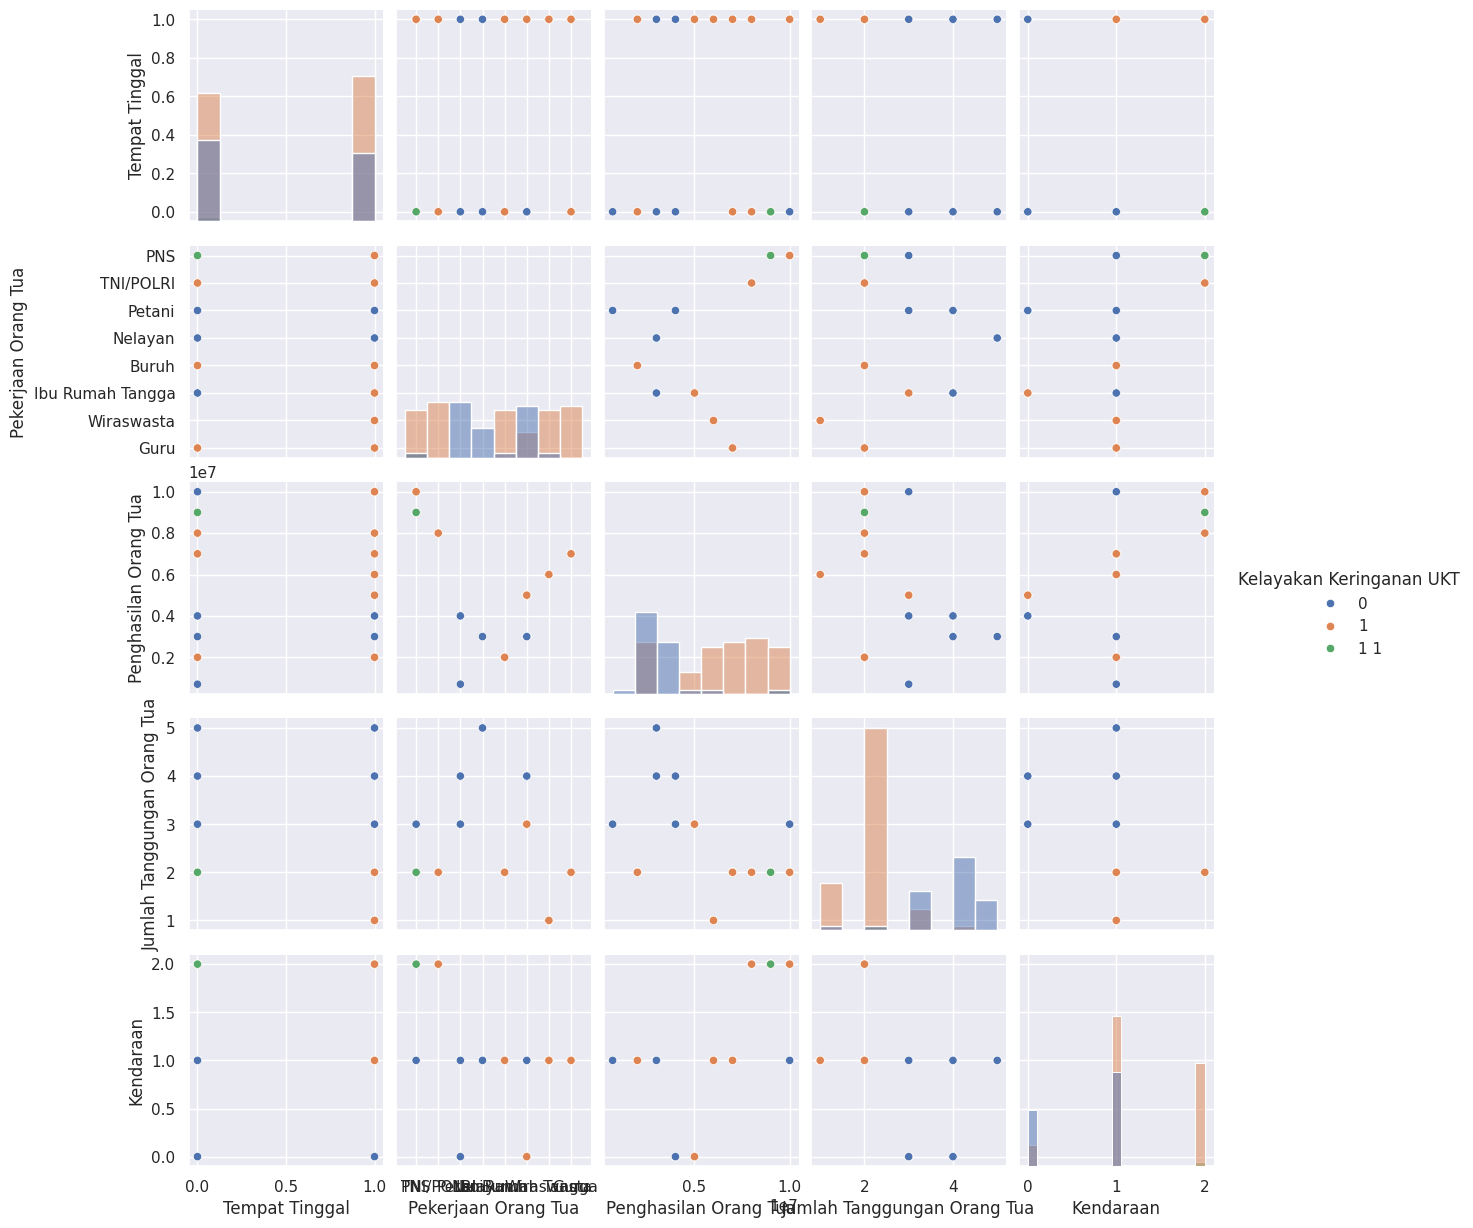

In [19]:
#visualisasi. warna dibedakan berdasarkan kelayakan keringanan ukt apakah layak atau tidak
sns.pairplot(ukt, vars=['Tempat Tinggal', 'Pekerjaan Orang Tua', 'Penghasilan Orang Tua', 'Jumlah Tanggungan Orang Tua', 'Kendaraan'], hue='Kelayakan Keringanan UKT', diag_kind='hist')


Kode ini menggunakan sns.pairplot dari library Seaborn untuk membuat visualisasi hubungan antara pasangan variabel dari dataset UKT. Variabel-variabel yang dipilih untuk dianalisis adalah 'Penghasilan Orang Tua', 'Jumlah Tanggungan Orang Tua', dan 'Kendaraan'.

sns.pairplot: Ini adalah fungsi dari Seaborn yang menghasilkan grid dari scatter plots (plot titik-titik) yang menunjukkan hubungan antara pasangan variabel.

ukt: merupakan nama dataset yang berisi data sosial ekonomi mahasiswa dan informasi kelayakan keringanan UKT.

vars: Digunakan untuk menentukan variabel numerik mana yang ingin dimunculkan dalam scatter plot. Dalam hal ini misalnya:
vars = ['Penghasilan Orang Tua', 'Jumlah Tanggungan Orang Tua', 'Kendaraan'].

hue='Kelayakan Keringanan UKT': Parameter ini menentukan bahwa warna titik-titik dalam grafik akan dibedakan berdasarkan nilai kolom 'Kelayakan keringanan UKT'. Titik dengan nilai 1 (layak) dan 0 (tidak layak) akan diberi warna yang berbeda.

Dengan menggunakan pairplot dan membagi warna berdasarkan 'Kelayakan Keringanan UKT', visualisasi ini membantu mengidentifikasi pola atau trend dalam hubungan antar variabel ekonomi mahasiswa dan bagaimana kaitannya dengan kemungkinan menerima keringanan UKT. Misalnya, kita dapat melihat apakah mahasiswa dari keluarga berpenghasilan lebih rendah cenderung lebih sering mendapatkan keringanan UKT.setiap scatter plot dalam grid akan menunjukkan hubungan antara dua variabel, di mana titik-titik diberi warna yang berbeda tergantung pada apakah pasien memiliki diabetes atau tidak. Ini membantu untuk melihat pola atau tren yang mungkin ada dalam hubungan antar variabel dan bagaimana pola tersebut berkaitan dengan keberadaan diabetes pada dataset.

In [20]:
import seaborn as sns
import pandas as pd

# Ensure 'Kelayakan Keringanan UKT' is treated as numerical
ukt['Kelayakan Keringanan UKT'] = pd.to_numeric(ukt['Kelayakan Keringanan UKT'], errors='coerce')  # Convert to numeric, handle errors

# Include 'Kelayakan Keringanan UKT' in the numerical features
numerical_features = ukt.select_dtypes(include=['number']).columns

ukt_numerical = ukt[numerical_features]

# Convert other columns with potential string values to numeric, handling errors
for col in ukt_numerical.columns:
    if col != 'Kelayakan Keringanan UKT':  # Skip 'Kelayakan Keringanan UKT' as it's already handled
        try:
            ukt_numerical[col] = pd.to_numeric(ukt_numerical[col])
        except ValueError:
            print(f"Column '{col}' contains non-numeric values. These will be ignored in correlation calculation.")
            ukt_numerical = ukt_numerical.drop(columns=[col])  # Remove the problematic column

# Calculate correlation for numerical features only
correlation_with_kelayakan_keringanan_ukt = ukt_numerical.corr()['Kelayakan Keringanan UKT'].sort_values(ascending=False)

# Display correlation
print(correlation_with_kelayakan_keringanan_ukt)


Kelayakan Keringanan UKT       1.000000
Penghasilan Orang Tua          0.530747
Kendaraan                      0.492656
Tempat Tinggal                 0.070860
Jumlah Tanggungan Orang Tua   -0.789762
Name: Kelayakan Keringanan UKT, dtype: float64


<ipython-input-20-34da72f03208>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ukt_numerical[col] = pd.to_numeric(ukt_numerical[col])


Output ini merupakan nilai korelasi antara variabel 'Kelayakan Keringanan UKT' (sebagai kolom target) dengan setiap variabel lainnya dalam dataset. Nilai korelasi berkisar antara -1 hingga 1.

Korelasi Positif: Nilai korelasi yang mendekati 1 menunjukkan adanya hubungan positif yang kuat. Misalnya, variabel 'Penghasilan Orang Tua' memiliki nilai korelasi sebesar 0.530747 terhadap 'Kelayakan Keringanan UKT'. Ini menunjukkan bahwa semakin tinggi penghasilan, semakin besar kemungkinan mahasiswa tidak layak mendapatkan keringanan UKT. Artinya, mahasiswa dari keluarga berpenghasilan rendah lebih berpeluang mendapatkan keringanan.

Demikian pula, variabel 'Kendaraan' juga menunjukkan korelasi positif (0.492656), yang berarti semakin banyak kendaraan yang dimiliki keluarga, cenderung semakin tidak layak menerima keringanan UKT.

Korelasi Negatif: Nilai korelasi negatif menunjukkan hubungan berlawanan. Dalam hal ini, 'Jumlah Tanggungan Orang Tua' memiliki korelasi negatif yang cukup kuat sebesar -0.789762 terhadap 'Kelayakan Keringanan UKT'. Artinya, semakin banyak jumlah tanggungan dalam keluarga, semakin layak mahasiswa untuk menerima keringanan. Hal ini mencerminkan kondisi ekonomi keluarga yang lebih berat.

Korelasi Dekat dengan 0: Nilai korelasi yang mendekati 0 menunjukkan bahwa variabel tersebut memiliki hubungan yang sangat lemah atau tidak signifikan terhadap target. Contohnya adalah 'Tempat Tinggal' dengan korelasi sebesar 0.070860, yang menunjukkan bahwa lokasi tempat tinggal tidak memiliki pengaruh yang berarti terhadap kelayakan keringanan UKT dalam dataset ini.



Ringkasnya, nilai-nilai korelasi ini membantu untuk mengidentifikasi variabel-variabel yang paling berpengaruh terhadap kelayakan keringanan UKT. Variabel seperti jumlah tanggungan, penghasilan orang tua, dan jumlah kendaraan menunjukkan hubungan yang cukup jelas, dan dapat digunakan sebagai indikator penting dalam sistem pengambilan keputusan atau pemodelan prediktif.



# **LANGKAH-LANGKAH PEMODELAN UNTUK NAIVE BAYES DAN KNN**

### Untuk Naive Bayes dan KNN Langkah pertama adalah
**MEMISAHKAN VARIABEL X DAN Y**

Dalam analisis klasifikasi, pemisahan data menjadi data X dan data y adalah langkah penting dalam persiapan data. Ini dilakukan untuk memisahkan variabel independen (fitur) dari variabel dependen dalam dataset.

Data X (Fitur/Features): Merupakan kumpulan data yang terdiri dari variabel-variabel sosial ekonomi mahasiswa dan keluarganya. Fitur-fitur ini digunakan oleh model untuk mengenali pola dan melakukan prediksi apakah seorang mahasiswa layak atau tidak layak menerima keringanan UKT.

Data y (Kelayakan Keringanan UKT/Labels): Merupakan kolom 'Kelayakan Keringanan UKT', yaitu variabel target yang ingin diprediksi.

Pemisahan ini penting karena:

Melatih Model: Data X digunakan untuk melatih model. Model belajar dari pola-pola yang ada di dalam data X untuk dapat memprediksi atau mengklasifikasikan data dengan tepat.

Validasi dan Evaluasi: Data y dibutuhkan untuk menguji seberapa baik model yang sudah dilatih mampu melakukan prediksi. Dengan memisahkan data fitur dan label, kita bisa membangun sistem prediksi yang objektif dan bisa digunakan dalam pengambilan keputusan terkait pemberian keringanan UKT secara adil dan terukur.

In [21]:
#memisahkan data menjadi variabel x dan y
X=ukt.drop(['Kelayakan Keringanan UKT'], axis=1)
y=ukt['Kelayakan Keringanan UKT']

### 'Untuk Naive Bayes dan KNN, Langkah kedua adalah
**MEMBAGI DATA MENJADI DATA TRAINING DAN TESTING**


Data training adalah bagian dari dataset yang digunakan untuk melatih model dalam pembelajaran mesin. Data ini digunakan untuk mempelajari pola dan hubungan antara fitur (variabel independen) dan label atau target yang diinginkan (variabel dependen). Model belajar dari data training untuk mengidentifikasi pola-pola yang ada dan menyesuaikan parameter-parameter internalnya agar dapat membuat prediksi yang akurat pada data baru.

Sementara itu, data testing (atau data uji) merupakan bagian dari dataset yang digunakan untuk menguji kinerja model yang telah dilatih dengan data training. Data ini tidak digunakan dalam proses pelatihan dan digunakan untuk mengevaluasi seberapa baik model mampu menggeneralisasi pada data baru yang belum pernah dilihat sebelumnya. Data testing membantu mengukur seberapa baik model mampu memprediksi label atau output yang benar untuk data yang tidak pernah dilihat sebelumnya, membantu memastikan bahwa model tidak hanya mengingat data yang telah dilatih tapi juga mampu mengadopsi pola umum yang ditemui pada data baru.


besarnya pembagian data:

Pemisahan data training dan testing adalah keputusan yang penting dalam pembuatan model yang dapat diandalkan. Secara umum, tidak ada aturan baku tentang seberapa besar persentase data yang harus dialokasikan untuk training dan testing, namun terdapat praktik umum yang dapat dipertimbangkan:

Pemisahan Standar: Pembagian yang sering digunakan adalah 70-30 atau 80-20, di mana sekitar 70% atau 80% dari data digunakan untuk training dan sisa 30% atau 20% digunakan untuk testing. Ini bisa menjadi awal yang baik untuk banyak kasus.

Data yang Lebih Besar: Jika datasetnya besar, pemisahan seperti 90-10 atau bahkan 95-5 mungkin dapat dilakukan. Model dengan lebih banyak data training cenderung memiliki kinerja yang lebih baik, tetapi harus diingat bahwa kita ingin memiliki cukup data di testing untuk evaluasi yang akurat.


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**from** sklearn.model_selection import train_test_split: Ini adalah baris yang mengimpor fungsi train_test_split dari pustaka Scikit-Learn. Fungsi ini memungkinkan untuk dengan mudah membagi dataset menjadi bagian training dan testing.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0): Ini adalah pemanggilan fungsi train_test_split. Parameter yang digunakan adalah sebagai berikut:

X: Merupakan variabel yang berisi fitur atau atribut-atribut dari dataset.(ingat X besar)
y: Merupakan variabel yang berisi target atau label dari dataset. (ingat y kecil)
test_size=0.2: Parameter ini menentukan proporsi dari dataset yang akan dialokasikan untuk testing. Dalam contoh ini, 0.2 berarti 20% dari data akan menjadi data testing.
random_state=0: Parameter ini menentukan seed atau nilai awal untuk generator angka acak yang digunakan dalam pembagian data. Ini berguna untuk memastikan bahwa pembagian data ini dapat direproduksi secara konsisten. Jika nilai ini tetap, pembagian data akan sama setiap kali kode ini dijalankan.


Hasil dari fungsi train_test_split adalah empat keluaran:

X_train: Data training untuk fitur-fitur.
X_test: Data testing untuk fitur-fitur.
y_train: Data training untuk target atau label.
y_test: Data testing untuk target atau label.
Dengan memisahkan dataset menjadi empat bagian ini, X_train dan y_train digunakan untuk melatih model, sementara X_test dan y_test digunakan untuk menguji performa model yang telah dilatih. Ini membantu dalam mengevaluasi seberapa baik model yang dihasilkan mampu menggeneralisasi pada data baru yang belum pernah dilihat sebelumnya.

In [23]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Assuming X_train and X_test are your DataFrames

# Identify numerical and categorical features
numerical_features = X_train.select_dtypes(include=['number']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# Create transformers for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore')),
])

# Apply ColumnTransformer to the respective features
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features),
    ])

# Fit and transform the training data
X_train = preprocessor.fit_transform(X_train)

# Transform the test data
X_test = preprocessor.transform(X_test)

print(X_train)

[[1.         0.35483871 0.5        0.         0.         0.
  0.         0.         0.         1.         0.         0.        ]
 [0.         0.24731183 0.75       0.5        0.         0.
  1.         0.         0.         0.         0.         0.        ]
 [1.         0.24731183 1.         0.5        0.         0.
  0.         1.         0.         0.         0.         0.        ]
 [0.         0.89247312 0.25       1.         0.         0.
  0.         0.         1.         0.         0.         0.        ]
 [0.         0.67741935 0.25       0.5        0.         1.
  0.         0.         0.         0.         0.         0.        ]
 [1.         0.56989247 0.         0.5        0.         0.
  0.         0.         0.         0.         0.         1.        ]
 [0.         0.89247312 0.25       1.         0.         0.
  0.         0.         1.         0.         0.         0.        ]
 [0.         0.         0.5        0.5        0.         0.
  0.         0.         0.         1.

MinMaxScaler adalah salah satu metode dalam Scikit-Learn yang digunakan untuk melakukan normalisasi atau penyekalaan fitur-fitur pada rentang nilai tertentu, biasanya antara 0 dan 1.

Pada kode yang diberikan:

MinMaxScaler().fit_transform(X_train) digunakan untuk melakukan normalisasi pada data training (X_train). MinMaxScaler().fit_transform(X_test) digunakan untuk melakukan normalisasi pada data testing (X_test). Pada intinya, MinMaxScaler melakukan normalisasi fitur-fitur dengan cara mengubah nilai setiap fitur sehingga rentang nilainya berada dalam interval yang ditentukan (biasanya antara 0 dan 1).

fit_transform() digunakan untuk melakukan dua hal sekaligus: fit(): Menghitung nilai minimum dan maksimum untuk setiap fitur di data training. transform(): Melakukan normalisasi dengan menggunakan nilai minimum dan maksimum yang sudah dihitung tadi untuk mengubah setiap fitur dalam rentang nilai yang diinginkan.

# **# NAIVE BAYES**

### 3. PELATIHAN MODEL (GaussianNB)

In [28]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [29]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Assuming X_train and X_test are your DataFrames
X_train_df = pd.DataFrame(X_train) # Convert X_train to DataFrame
X_test_df = pd.DataFrame(X_test)  # Convert X_test to DataFrame


# Identify numerical and categorical features
numerical_features = X_train_df.select_dtypes(include=['number']).columns
categorical_features = X_train_df.select_dtypes(include=['object']).columns

# Create transformers for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore')),  # sparse=False for dense output
])

# Apply ColumnTransformer to the respective features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features),
    ])

# Fit and transform the training data
X_train = preprocessor.fit_transform(X_train_df)

# Transform the test data
X_test = preprocessor.transform(X_test_df)

# Convert the NumPy array back to a Pandas DataFrame for easier handling if needed
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

print(X_train)

     0         1     2    3    4    5    6    7    8    9    10   11
0   1.0  0.354839  0.50  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
1   0.0  0.247312  0.75  0.5  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
2   1.0  0.247312  1.00  0.5  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
3   0.0  0.892473  0.25  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
4   0.0  0.677419  0.25  0.5  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
..  ...       ...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
75  1.0  0.569892  0.00  0.5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0
76  1.0  0.784946  0.25  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
77  1.0  0.569892  0.00  0.5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0
78  1.0  1.000000  0.25  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
79  1.0  0.139785  0.25  0.5  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

[80 rows x 12 columns]


In [30]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

# ... (your preprocessing code) ...

# Fit the model to the training data
nb.fit(X_train, y_train) #This line is added to train the model

# Now you can compute the accuracy
nb.score(X_train, y_train)

0.9375

In [31]:
classif_name = ['NB']
y_predict = {}
y_predict['NB'] = nb.predict(X_test)

### 4. EVALUASI MODEL (NAIVE BAYES)

**Evaluasi Model Menggunakan Akurasi**

In [32]:
# Before calculating the accuracy score
import numpy as np
from sklearn.metrics import accuracy_score


#Replace NaN with 0 in predictions if needed
y_test = np.nan_to_num(y_test)  # Replace NaN with 0
# Now calculate the accuracy
#for name in classif_name:
print('{0} accuracy = {1:.4f}'.format('NB', accuracy_score(y_test, y_predict['NB'])))

NB accuracy = 0.7500


**Evaluasi Model Menggunakan Confusion Matrix**

In [34]:
# Before calculating the accuracy score
import numpy as np
from sklearn.metrics import accuracy_score


#Replace NaN with 0 in predictions if needed
y_test = np.nan_to_num(y_test)  # Replace NaN with 0
# Now calculate the accuracy
#for name in classif_name:
print('{0} accuracy = {1:.4f}'.format('NB', accuracy_score(y_test, y_predict['NB'])))
print("Classification Report:\n", classification_report(y_test, y_predict['NB']))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_predict['NB']))


NB accuracy = 0.7500
Classification Report:
               precision    recall  f1-score   support

         0.0       0.67      0.75      0.71         8
         1.0       0.82      0.75      0.78        12

    accuracy                           0.75        20
   macro avg       0.74      0.75      0.74        20
weighted avg       0.76      0.75      0.75        20

Confusion Matrix:
 [[6 2]
 [3 9]]


**Evaluasi model menggunakan akurasi pada Naive Bayes adalah 0,7500 atau 75%**

**Untuk evaluasi model menggunakan confusion matrix pada Naive Bayes adalah**
[[6 2]
[3 9]]

# **# Proses membuat model dengan Neural Network**

### 3. PELATIHAN MODEL

In [37]:
#Menguji parameter yang paling optimum untuk model

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd # Import pandas for handling DataFrames


cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=100)

# --- Preprocessing ---
# Identify numerical and categorical features
numerical_features = X.select_dtypes(include=['number']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create transformers for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore')),  # sparse=False for dense output
])

# Apply ColumnTransformer to the respective features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features),
    ])

# Fit and transform the data
X = preprocessor.fit_transform(X)


# --- Grid Search ---
# Tentukan parameter yang ingin diuji
parameters = {
    'hidden_layer_sizes': [(50,), (100,), (50, 30), (100, 50)],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [100, 200, 300]
}

# Buat model MLPClassifier
clf = MLPClassifier(random_state=100)

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(clf, parameters, cv=cv_strategy)
# cv merupakan jumlah lipatan validasi silang (cross-validation)

# --- Handle NaN values in 'y' ---
y = y.fillna(y.mode()[0])  # Replace NaNs with the most frequent value in 'y'
# Or consider other imputation strategies if mode is not appropriate

# Or, if you prefer to drop rows with NaN in 'y'
# ukt = ukt.dropna(subset=['Kelayakan Keringanan UKT'])
# X = ukt.drop(['Kelayakan Keringanan UKT'], axis=1)
# y = ukt['Kelayakan Keringanan UKT']

# Lakukan pencarian grid pada data training
grid_search.fit(X, y)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptro

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
             estimator=MLPClassifier(random_state=100),
             param_grid={'hidden_layer_sizes': [(50,), (100,), (50, 30),
                                                (100, 50)],
                         'learning_rate_init': [0.001, 0.01, 0.1],
                         'max_iter': [100, 200, 300]})

Tentukan Parameter yang Ingin diuji: parameters adalah kamus yang berisi parameter-parameter yang ingin diuji. Pada contoh ini, parameter yang diuji meliputi hidden_layer_sizes (berbagai kombinasi jumlah dan ukuran hidden layers), learning_rate_init (berbagai tingkat pembelajaran awal), dan max_iter (berbagai jumlah iterasi).

Inisialisasi Model: MLPClassifier() digunakan untuk membuat model Neural Network Multi-Layer Perceptron (MLP) dengan parameter default.

Untuk memastikan bahwa hasil dari GridSearchCV konsisten setiap kali dijalankan, kamu bisa menambahkan argumen random_state pada GridSearchCV dan MLPClassifier. Penggunaan random_state ini akan memastikan bahwa inisialisasi yang melibatkan keputusan acak (seperti pembagian data menjadi lipatan validasi silang atau inisialisasi parameter awal pada Neural Network) dilakukan secara konsisten dalam setiap percobaan.Penting untuk dicatat bahwa pilihan nilai random_state tidak harus spesifik pada angka 100; angka lainnya juga dapat digunakan, asalkan nilai random_state yang sama digunakan dalam kondisi yang sama untuk memastikan konsistensi hasil saat menjalankan kode yang menggunakan random state.

Inisialisasi GridSearchCV: GridSearchCV digunakan untuk melakukan pencarian parameter terbaik dengan memanfaatkan cross-validation. cv=5 menunjukkan bahwa validasi silang dilakukan dengan 5 lipatan (5-fold cross-validation).


Pencarian Grid pada Data Training: grid_search.fit(X, y) melakukan pencarian parameter terbaik dengan memanfaatkan data training (X adalah fitur-fitur, y adalah target/label).

GridSearchCV akan mengevaluasi semua kombinasi parameter yang mungkin dari parameters yang telah ditentukan dan akan melakukan pelatihan serta evaluasi model pada setiap kombinasi tersebut. Tujuan utamanya adalah untuk menemukan kombinasi parameter yang menghasilkan model dengan performa terbaik berdasarkan metrik evaluasi yang dipilih (misalnya, akurasi, presisi, atau recall).

Setelah proses pencarian selesai, parameter terbaik dapat diakses melalui atribut best_params_ dari objek grid_search. Atribut ini akan menampilkan kombinasi parameter terbaik yang diidentifikasi selama pencarian grid.

In [38]:
# Tampilkan parameter terbaik
print("Parameter terbaik:", grid_search.best_params_)

Parameter terbaik: {'hidden_layer_sizes': (50,), 'learning_rate_init': 0.01, 'max_iter': 100}


In [39]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(50,),learning_rate_init=0.1,max_iter=100)

clf.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=100)

Kode yang disediakan menggunakan MLPClassifier dari library Scikit-Learn untuk membuat model Neural Network berbasis Multi-Layer Perceptron (MLP) dengan parameter tertentu dan melatihnya pada data training.

Dalam kasus ini, model MLPClassifier dibuat dengan parameter-parameter tertentu yang telah ditentukan secara manual. Parameter-parameter ini adalah:

hidden_layer_sizes=(50,): Ini adalah tuple yang menunjukkan arsitektur dari jaringan saraf. (50,) berarti terdapat satu hidden layersberisi 50 neuron.

learning_rate_init=0.1: Parameter ini adalah tingkat pembelajaran awal. Ini menunjukkan seberapa besar model akan menyesuaikan bobotnya berdasarkan kesalahan pada setiap iterasi.

max_iter=100: Parameter ini menunjukkan jumlah maksimum iterasi yang akan dilakukan saat melatih model. Ini mengontrol seberapa banyak iterasi atau epoch yang akan dilakukan selama proses pelatihan.

### **4. EVALUASI MODEL KNN**

**Evaluasi Model Menggunakan Akurasi**

In [40]:
y_pred = clf.predict(X_test)

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.75      0.86         8
         1.0       0.86      1.00      0.92        12

    accuracy                           0.90        20
   macro avg       0.93      0.88      0.89        20
weighted avg       0.91      0.90      0.90        20



Hasil dari laporan klasifikasi tersebut memberikan ringkasan performa model Neural Network pada data uji (diabetes) dengan menggunakan berbagai metrik evaluasi seperti precision, recall, dan f1-score. Berikut adalah interpretasi dari setiap metrik yang tercantum dalam laporan:

Precision:
0 (Kelas Negatif): Dari semua prediksi yang dilakukan sebagai kelas negatif, sekitar 80% di antaranya adalah benar-benar kelas negatif.
1 (Kelas Positif): Sekitar 80% dari semua prediksi yang dilakukan sebagai kelas positif adalah benar.

Recall:
0 (Kelas Negatif): Dari semua sampel yang sebenarnya adalah kelas negatif, model mampu mengenali sekitar 96% dari mereka.
1 (Kelas Positif): Dari semua sampel yang sebenarnya adalah kelas positif, model hanya dapat mengenali sekitar 37% dari mereka.

F1-Score:
F1-score adalah ukuran rata-rata harmonis dari precision dan recall. F1-score untuk kelas 0 adalah 0.87, sedangkan untuk kelas 1 adalah 0.51. F1-score semakin tinggi semakin baik, karena mencoba untuk menggabungkan keseimbangan antara precision dan recall.

Accuracy:
Akurasi model adalah sekitar 80%, yang mengindikasikan seberapa baik model dapat memprediksi dengan benar secara keseluruhan dari seluruh sampel.

Interpretasi:
Meskipun akurasi secara keseluruhan adalah 80%, melihat pada recall untuk kelas 1 (0.37) menunjukkan bahwa model memiliki performa yang lebih rendah dalam mengidentifikasi kasus positif (1).
Terlihat bahwa model memiliki kemampuan yang baik dalam memprediksi kasus negatif (0) tetapi kurang baik dalam memprediksi kasus positif (1). Interpretasi ini penting tergantung pada konteks aplikasi, karena keseimbangan antara kelas 0 dan 1 bisa menjadi kunci dalam pengambilan keputusan yang dihasilkan oleh model..

In [42]:
from sklearn.metrics import accuracy_score

round(accuracy_score(y_test,y_pred),3)

0.9

**Evaluasi model menggunakan akurasi pada KNN adalah 0,9**


Output 0.9 yang dihasilkan dari accuracy_score menunjukkan tingkat akurasi dari model klasifikasi yang dilatih. Dalam konteks ini, angka 9 berarti bahwa model berhasil memprediksi dengan benar sekitar 90% dari semua sampel pada data uji (y_test) yang telah digunakan.

**Evaluasi Model Menggunakan Confusion Matrix**

In [44]:
# Assuming 'X' is your original feature DataFrame before scaling
# Assuming 'y' is your target variable

# Standarisasi (untuk KNN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) # Scale the original features 'X', not a subset

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# ... (Your KNN model training code) ...
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Make predictions on the entire test set (X_test)
y_pred_knn = knn.predict(X_test) # Fix: Predict on X_test

# ... (Your evaluation code) ...
print("=== Evaluasi KNN ===")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

=== Evaluasi KNN ===
Confusion Matrix:
 [[ 4  2]
 [ 0 24]]


***Evaluasi model menggunakan confusion matrix pada KNN adalah ***
 [[ 4  2]
 [ 0 24]]

**KESIMPULAN**

Model Naive Bayes memiliki akurasi 75% dimana cepat dan ringan, namun performanya sedikit kurang, karena asumsi distribusi.

Sedangkan, KNN memiliki akurasi 90% karena datanya termasuk kecil, dan cocok saat data berskala seimbang.

Jadi, pada dataset ini, model KNN memberikan performa klasifikasi yang lebih baik dibandingkan Naive Bayes. Hal ini terjadi, karena data relatif kecil dan KNN bekerja lebih baik pada data yang terstandarisasi dan tidak terlalu kompleks.